In [1]:
import pandas as pd
df = pd.read_csv('C:/Working/AI/Fraudulent Transaction Data/data/Fraud.csv', sep = ',')

In [2]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
### Problem 3: Understanding the Features


#step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

#type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.'

#amount - amount of the transaction in local currency.'

#nameOrig - customer who started the transaction'

#oldbalanceOrg - initial balance before the transaction

#newbalanceOrig - new balance after the transaction'

#nameDest - customer who is the recipient of the transaction'

#oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).'

#newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).'

#isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.'

#isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.'

#```

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


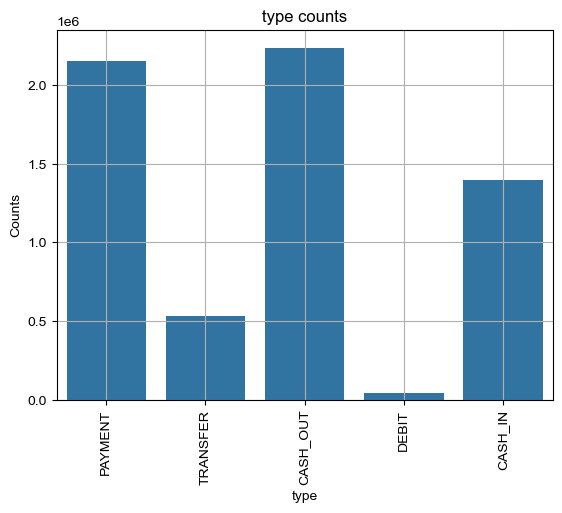

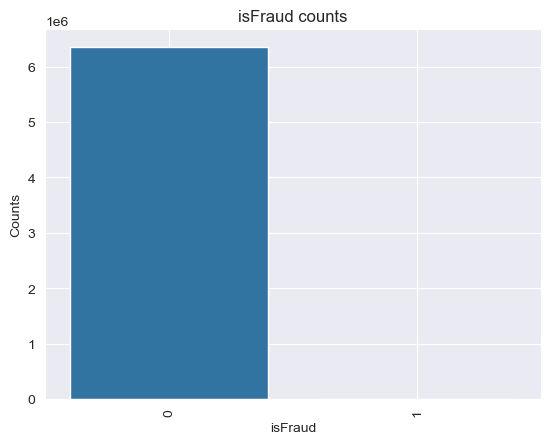

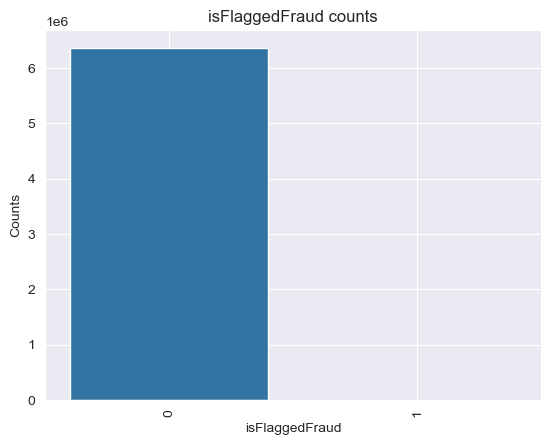

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

feature_array = ['type','isFraud','isFlaggedFraud'];

# Using a for loop
for dim_name in feature_array:

    sns.countplot(x=dim_name, data=df)

    sns.set_style('darkgrid')

    plt.grid(True)
    plt.title(dim_name + ' counts')
    plt.xlabel(dim_name)
    plt.ylabel('Counts')
    plt.xticks(rotation=90)
    plt.savefig("C:/Working/AI/Fraudulent Transaction Data/images" + dim_name + "_bar.png")
    plt.show()

In [13]:
print(df.groupby('type')['type'].count())

type
CASH_IN     1399284
CASH_OUT    2237500
DEBIT         41432
PAYMENT     2151495
TRANSFER     532909
Name: type, dtype: int64


In [15]:
is_fraud = (df['isFraud'] > 0).sum()
print(is_fraud)

isFlaggedFraud = (df['isFlaggedFraud'] > 0).sum()
print(isFlaggedFraud)

8213
16


In [16]:
df = df.dropna()

In [17]:
print(df.groupby('type')['type'].count())

type
CASH_IN     1399284
CASH_OUT    2237500
DEBIT         41432
PAYMENT     2151495
TRANSFER     532909
Name: type, dtype: int64


In [18]:
baseline = df['isFraud'].value_counts(normalize = True)[0]
print(baseline)

0.9987091795518198


In [27]:
# Will evaluate multiple classification models:

In [29]:
#1 Decision Tree

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split

from sklearn import set_config

set_config("diagram")

In [33]:
X = df.select_dtypes(['float'])
y = df.isFraud

In [35]:
print(X)

             amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           9839.64      170136.00       160296.36            0.00   
1           1864.28       21249.00        19384.72            0.00   
2            181.00         181.00            0.00            0.00   
3            181.00         181.00            0.00        21182.00   
4          11668.14       41554.00        29885.86            0.00   
...             ...            ...             ...             ...   
6362615   339682.13      339682.13            0.00            0.00   
6362616  6311409.28     6311409.28            0.00            0.00   
6362617  6311409.28     6311409.28            0.00        68488.84   
6362618   850002.52      850002.52            0.00            0.00   
6362619   850002.52      850002.52            0.00      6510099.11   

         newbalanceDest  
0                  0.00  
1                  0.00  
2                  0.00  
3                  0.00  
4                  0.00  
...

In [38]:
#sns.pairplot(data = df, hue = 'isFraud')

In [41]:
X5 = X[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

dtree = DecisionTreeClassifier(max_depth = 2).fit(X5, y)
tree2 = export_text(dtree, feature_names = list(X5.columns))

print(tree2)

acc_depth_5 = DecisionTreeClassifier(max_depth=5).fit(X5, y).score(X5, y)

print (acc_depth_5)

|--- amount <= 2040206.00
|   |--- amount <= 0.00
|   |   |--- class: 1
|   |--- amount >  0.00
|   |   |--- class: 0
|--- amount >  2040206.00
|   |--- oldbalanceOrg <= 1971892.81
|   |   |--- class: 0
|   |--- oldbalanceOrg >  1971892.81
|   |   |--- class: 1

0.9991069716563302


In [66]:
#Precision = True Positives / (True Positives + False Positives)
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X5, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Accuracy: {accuracy:.2f}")



Precision: 0.86
Accuracy: 1.00


In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='precision', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")


Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score: 0.9531


In [ ]:
# 2 KNN:

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn import set_config

pipeline = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier())])
pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_test)
precision = precision_score(y_test, preds)
accuracy = accuracy_score(y_test, preds)

print(f"Precision: {precision:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Precision: 0.83
Accuracy: 1.00


In [60]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [71]:
# 3 Logistic Regression

from sklearn.linear_model import LinearRegression
selector = make_column_selector(dtype_include=object)
extractor = SelectFromModel(LogisticRegression(penalty='l1', solver = 'liblinear' ,random_state = 42))
transformer = make_column_transformer((OneHotEncoder(drop = 'first'), selector),
                                     remainder = StandardScaler())

lgr_pipe = Pipeline([('transformer', transformer),
                    ('selector', extractor),
                    ('lgr', LogisticRegression(random_state=42, max_iter = 1000))])

lgr_pipe.fit(X_train, y_train)

pipe_1_acc = lgr_pipe.score(X_test, y_test)
lr_preds = lgr_pipe.predict(X_test)
precision = precision_score(y_test, lr_preds)
accuracy = accuracy_score(y_test, lr_preds)

print(f"Precision: {precision:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Precision: 0.92
Accuracy: 1.00
